In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

## Synthetic dataset

In [17]:
X, y = make_classification(n_samples=1000, n_features=25, n_informative=8,
                           n_redundant=2, n_repeated=0, n_classes = 8,
                           n_clusters_per_class=1, random_state=0)

In [18]:
metrics = ["accuracy", "precision", "recall"]

Optimal number of features: 8
Optimal number of features: 8
Optimal number of features: 8


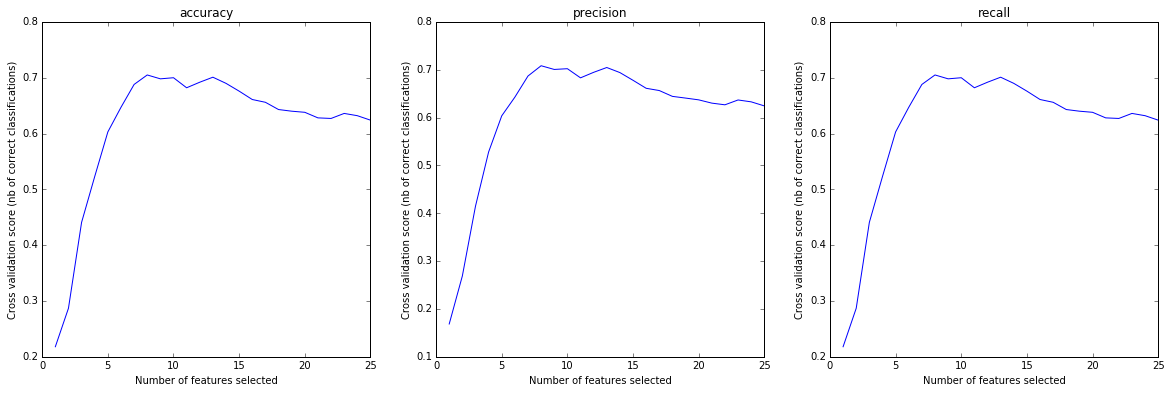

In [28]:
svc = SVC(kernel="linear")
plt.figure(figsize=(20,6))

for i, metric in enumerate(metrics):
    rfecv = RFECV(estimator=svc, step = 1, cv=StratifiedKFold(y,2), scoring=metric)
    rfecv.fit(X, y)
    
    print("Optimal number of features: %d" % rfecv.n_features_)
    print("Optimal number of features: %d" % rfecv.scoring)
    
    plt.subplot(1, 3, i+1)
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.title(metric)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

## Real data (20 newsgroups)

In [58]:
 categories = [
        'sci.electronics',
        'sci.space',
    ]

In [59]:
data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=('headers', 'footers', 'quotes'))

In [60]:
X, y = data_train.data, data_train.target

In [61]:
extractor = TfidfVectorizer().fit(X)
print(len(extractor.vocabulary_))

17984


In [ ]:
svc = SVC(kernel="linear")
plt.figure(figsize=(20,6))

for i, metric in enumerate(metrics):
    rfecv = RFECV(estimator=svc, step = 1, cv=StratifiedKFold(y,2), scoring=metric)
    rfecv.fit(extractor.transform(X), y)
    
    print("Optimal number of features: %d" % rfecv.n_features_)
    
    plt.subplot(1, 3, i+1)
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.title(metric)
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)